In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing v1

In [2]:
relation_df_train = pd.read_csv('../../new_data/Train/Relation/Relation.csv').drop(columns=['Unnamed: 0'])
relation_df_train.head()

,userid,like_id
0,c6a9a43058c8cc8398ca6e97324c0fae,8628204013
1,c6a9a43058c8cc8398ca6e97324c0fae,19040608370
2,c6a9a43058c8cc8398ca6e97324c0fae,24054583527
3,c6a9a43058c8cc8398ca6e97324c0fae,26726417043
4,c6a9a43058c8cc8398ca6e97324c0fae,31796936730


In [3]:
preprocessed_training_data = pd.DataFrame()

# Feature #1: How many likes a user has given on Facebook
like_counts_per_user = relation_df_train['userid'].value_counts()

# We will store our features in the preprocessed_training_data
preprocessed_training_data = preprocessed_training_data.assign(
    userid=like_counts_per_user.keys(),
    likes_given=like_counts_per_user.values
)

(0, 4553)

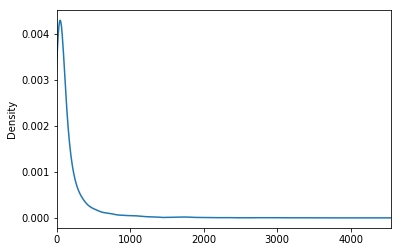

In [4]:
preprocessed_training_data['likes_given'].plot.kde().set_xlim(0, max(preprocessed_training_data['likes_given']))

In [5]:
preprocessed_training_data['likes_given'].describe()

count    9500.000000
mean      175.931895
std       332.786849
min         1.000000
25%        30.000000
50%        72.000000
75%       175.250000
max      4553.000000
Name: likes_given, dtype: float64

In [17]:
# Feature #2: The sum of the likes the pages the user liked have
#   For example, if the user liked the pages: x and y which have 13 and 12 likes respectively,
#   pages_liked_sum_likes = 25 for this user

like_counts_per_page = relation_df_train['like_id'].value_counts()

def get_userids(dataframe):
    return dataframe['userid']

def get_page_ids_liked_by_user(userid):
    return relation_df_train[relation_df_train['userid'] == userid]['like_id']

def get_page_total_likes(page_id):
    return like_counts_per_page[page_id]

# >15 minutes to run on the linux machine
preprocessed_training_data = preprocessed_training_data.assign(
    pages_liked_sum_likes=np.array([
        np.array([
            get_page_total_likes(page_id) for page_id in get_page_ids_liked_by_user(userid)
        ]).sum()
        for userid in get_userids(preprocessed_training_data)
    ])
)

In [19]:
preprocessed_training_data

,userid,likes_given,pages_liked_sum_likes
0,ed3a624866919c68e28343519850888c,4553,181237
1,9cd63231d57296ff76065355114ea2fd,4504,69904
2,0ab38e4d544251903c49e4306a43eace,4140,272858
3,b123e89dd4dcd800c1ffe5d1d73c14be,4003,81693
4,7f24f7fb09c6b3e7d8091a8eacc85a3a,3958,125450
5,2b27a31baf7e674b5647711e3d482223,3892,85076
6,2c5ed241a25b7673a8d1d1c7bb2ea537,3688,95998
7,1b2c0a049e97b45f1066b7e8f5f2f584,3481,140339
8,9d1eaec369c6f2c62a85333ba666dbdc,3471,221893
9,9607625a8b96e55fa0a454539f4171ff,3444,143382


In [31]:
# Let's normalise the fields to relative standard deviations instead:
preprocessed_training_data_std_distances = pd.DataFrame()
likes_given = {
    'mean': preprocessed_training_data.mean()['likes_given'],
    'std': preprocessed_training_data.std()['likes_given']
}
pages_liked_sum_likes = {
    'mean': preprocessed_training_data.mean()['pages_liked_sum_likes'],
    'std': preprocessed_training_data.std()['pages_liked_sum_likes']
}

preprocessed_training_data_std_distances = preprocessed_training_data_std_distances.assign(
    userid=preprocessed_training_data['userid'],
    likes_given_mean_std_dist=(
            preprocessed_training_data['likes_given'] - likes_given['mean']
        ).abs()/likes_given['std'],
    pages_liked_sum_likes_mean_std_dist=(
            preprocessed_training_data['pages_liked_sum_likes'] - pages_liked_sum_likes['mean']
        ).abs()/pages_liked_sum_likes['std']
)
preprocessed_training_data_std_distances

,userid,likes_given_mean_std_dist,pages_liked_sum_likes_mean_std_dist
0,ed3a624866919c68e28343519850888c,13.152768,7.001295
1,9cd63231d57296ff76065355114ea2fd,13.005526,2.365435
2,0ab38e4d544251903c49e4306a43eace,11.911733,10.816356
3,b123e89dd4dcd800c1ffe5d1d73c14be,11.500058,2.856324
4,7f24f7fb09c6b3e7d8091a8eacc85a3a,11.364836,4.678348
5,2b27a31baf7e674b5647711e3d482223,11.166511,2.997191
6,2c5ed241a25b7673a8d1d1c7bb2ea537,10.553506,3.451978
7,1b2c0a049e97b45f1066b7e8f5f2f584,9.931487,5.298319
8,9d1eaec369c6f2c62a85333ba666dbdc,9.901437,8.694194
9,9607625a8b96e55fa0a454539f4171ff,9.820304,5.425029


In [33]:
# Saving the v1 preprocessed data for later
# preprocessed_training_data.to_csv('relation_preprocessed_raw_v1.csv')
# preprocessed_training_data_std_distances.to_csv('relation_preprocessed_std_distances_v1.csv')

# Preprocessing v2

In [13]:
# Another idea of preprocessing is
like_counts_per_page = relation_df_train['like_id'].value_counts()
page_to_entry_mapping = {
    page_id: ...
    for page_id in like_counts_per_page.keys()
}

20381

# Training